In [2]:
import matplotlib.pyplot as plt
import json

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
%matplotlib inline

In [4]:
def json_plot(json_path):
    with open(json_path) as f:
        dat = json.load(f)
    train_loss = dat['train']
    dev_loss = dat['dev']
    x_lim = len(train_loss)
    y_lim_lb = 0.02
    y_lim_ub = 0.05
    fig = plt.figure()
    plt.plot(range(1,x_lim+1),train_loss,label='train')
    x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]
    plt.plot(x_per5,dev_loss,label='dev')
    plt.xlim(0,x_lim)
    plt.ylim(y_lim_lb,y_lim_ub)
    plt.title(json_path)
    fig.patch.set_alpha(1)
    plt.show()

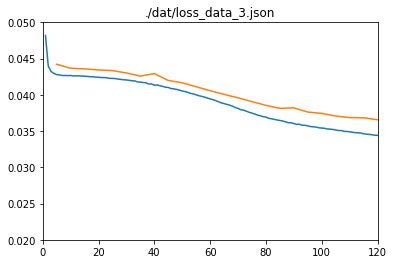

In [36]:
json_plot('./dat/loss_data_3.json')

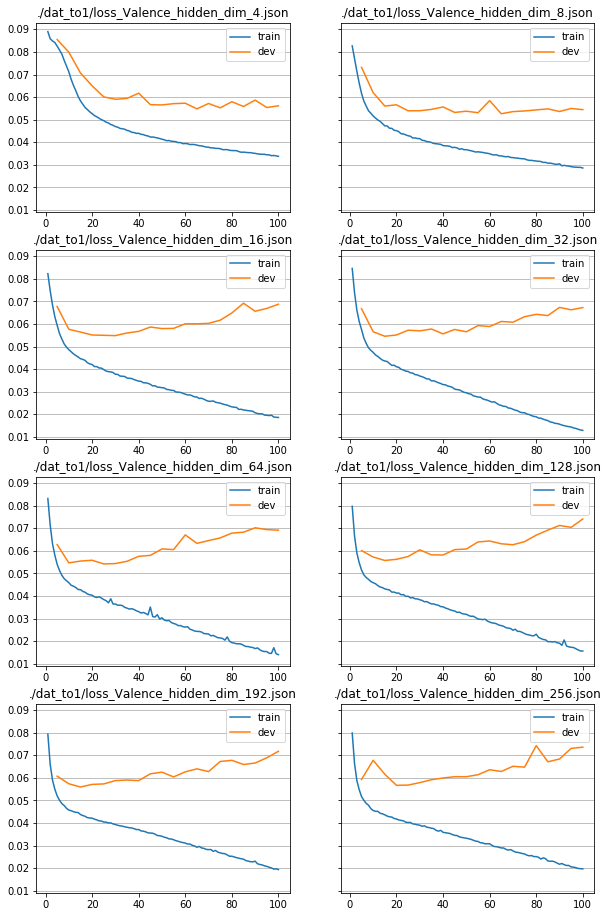

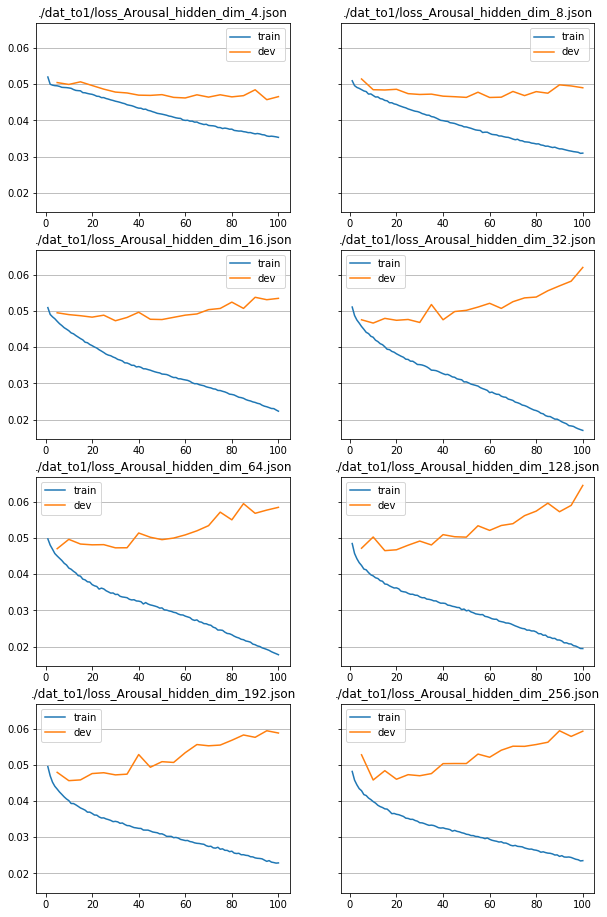

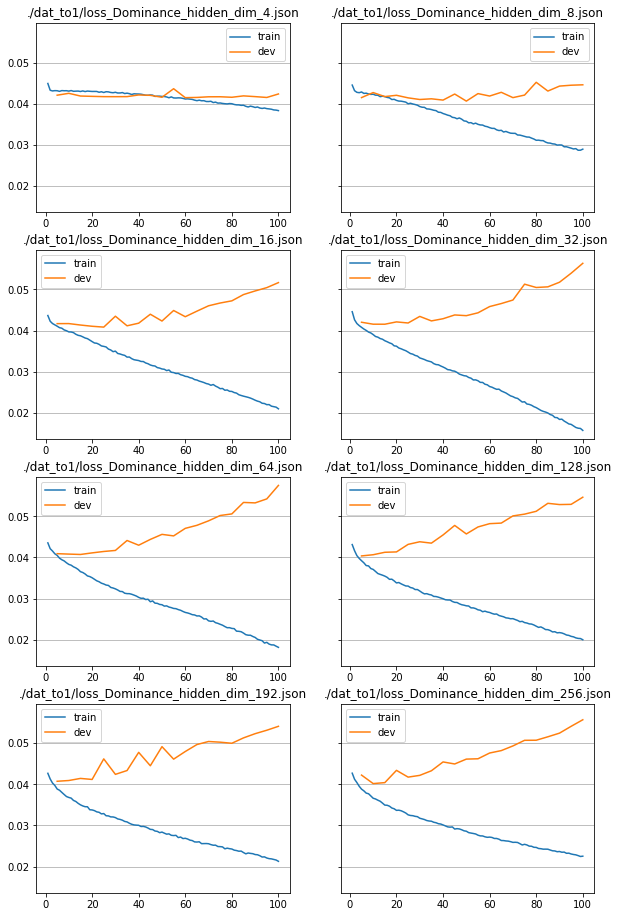

In [8]:
vad_types = ['Valence','Arousal','Dominance']
for vad_type in vad_types:
    fig, axes = plt.subplots(4, 2, sharey=True, figsize=(10,16))
    fig.patch.set_alpha(1)

    sample = [4,8,16,32,64,128,192,256]

    for j in range(4):
        for i in range(2):
            json_path = "./dat_to1/loss_{0}_hidden_dim_{1}.json".format(vad_type,sample[2*j+i])
            with open(json_path) as f:
                dat = json.load(f)
            train_loss = dat['train']
            dev_loss = dat['dev']

            x_lim = len(train_loss)
            x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]

            ax = axes[j, i]
            ax.plot(range(1,x_lim+1),train_loss)
            ax.plot(x_per5,dev_loss)
            ax.legend(['train','dev'])
            ax.set_title(json_path)
            ax.grid(True,axis='y')

    fig.savefig('loss_graph_{0}.png'.format(vad_type))